In [1]:
from sklearn.datasets import fetch_california_housing
import pandas as pd
import matplotlib.pyplot as plt
california_housing = fetch_california_housing(as_frame=True)

df = california_housing.frame


In [2]:


pd.set_option("display.max_columns",None)
pd.set_option("display.width",None)
print(df.head())
print(df.describe())

   MedInc  HouseAge  AveRooms  AveBedrms  Population  AveOccup  Latitude  \
0  8.3252      41.0  6.984127   1.023810       322.0  2.555556     37.88   
1  8.3014      21.0  6.238137   0.971880      2401.0  2.109842     37.86   
2  7.2574      52.0  8.288136   1.073446       496.0  2.802260     37.85   
3  5.6431      52.0  5.817352   1.073059       558.0  2.547945     37.85   
4  3.8462      52.0  6.281853   1.081081       565.0  2.181467     37.85   

   Longitude  MedHouseVal  
0    -122.23        4.526  
1    -122.22        3.585  
2    -122.24        3.521  
3    -122.25        3.413  
4    -122.25        3.422  
             MedInc      HouseAge      AveRooms     AveBedrms    Population  \
count  20640.000000  20640.000000  20640.000000  20640.000000  20640.000000   
mean       3.870671     28.639486      5.429000      1.096675   1425.476744   
std        1.899822     12.585558      2.474173      0.473911   1132.462122   
min        0.499900      1.000000      0.846154      0.3333

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   MedInc       20640 non-null  float64
 1   HouseAge     20640 non-null  float64
 2   AveRooms     20640 non-null  float64
 3   AveBedrms    20640 non-null  float64
 4   Population   20640 non-null  float64
 5   AveOccup     20640 non-null  float64
 6   Latitude     20640 non-null  float64
 7   Longitude    20640 non-null  float64
 8   MedHouseVal  20640 non-null  float64
dtypes: float64(9)
memory usage: 1.4 MB


In [4]:
df['MedInc'].value_counts()

,count
MedInc,
15.0001,49
3.1250,49
2.8750,46
2.6250,44
4.1250,44
...,...
3.6220,1
3.7238,1
4.6976,1


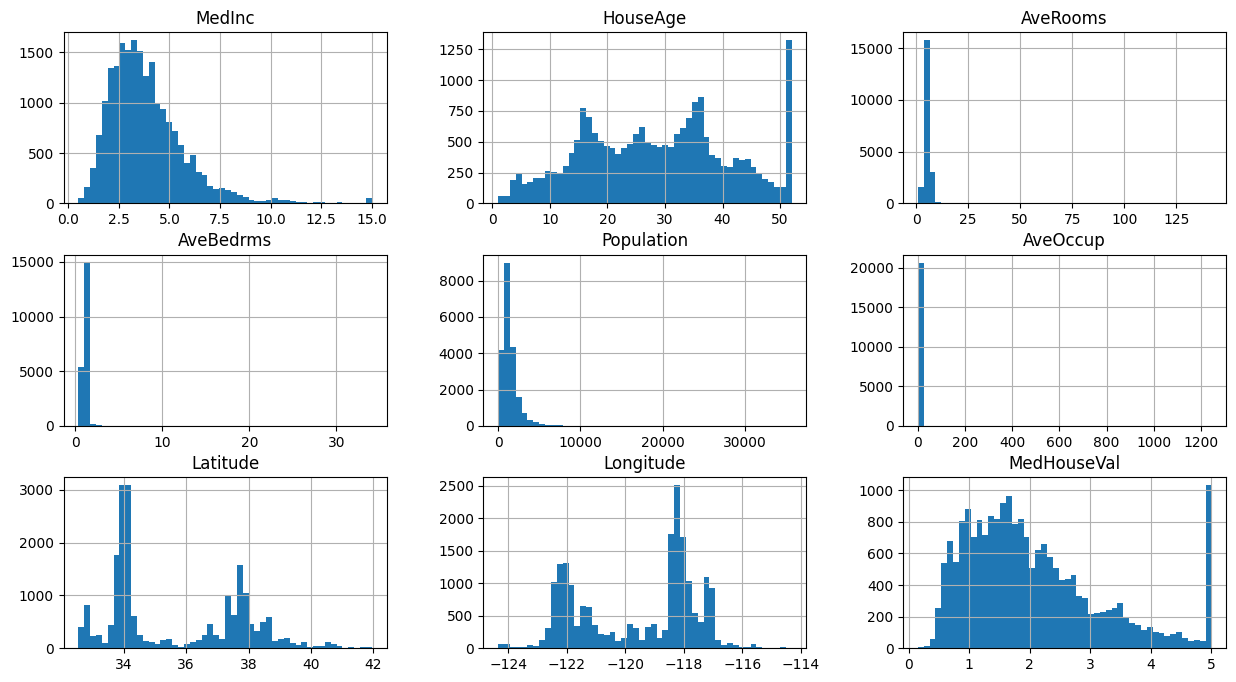

In [5]:
df.hist(bins=50,figsize=(15,8))
plt.show()

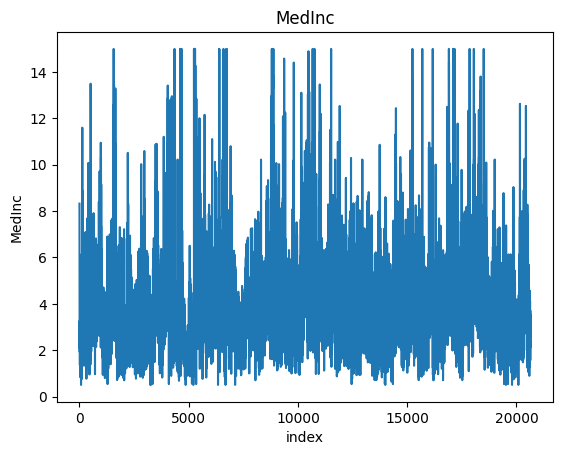

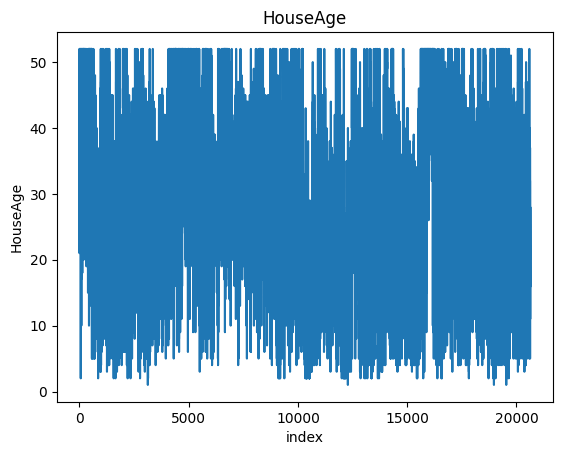

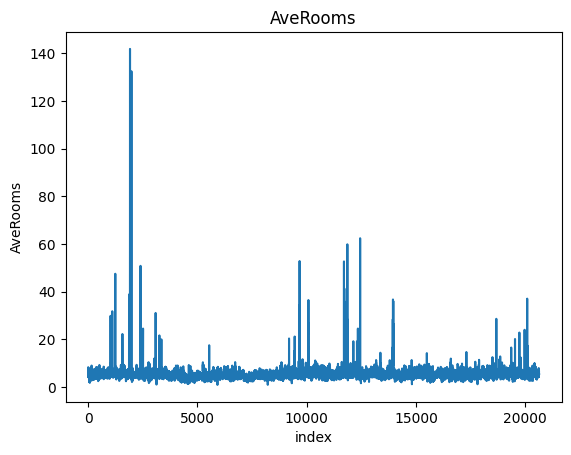

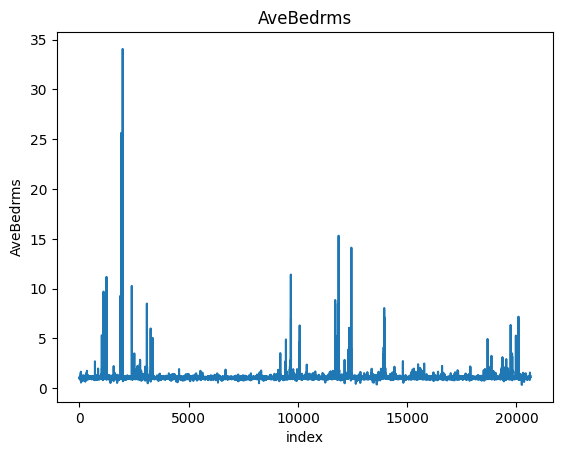

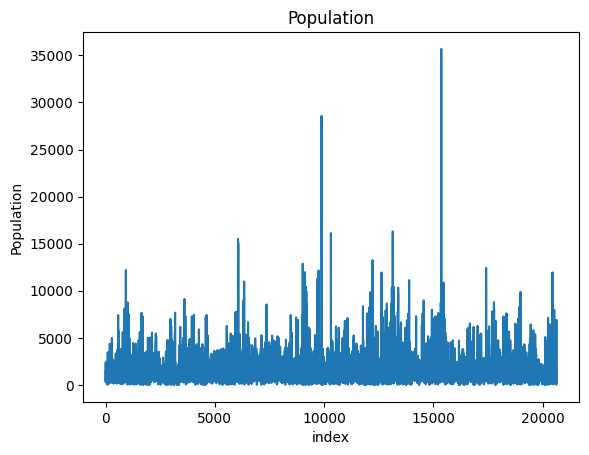

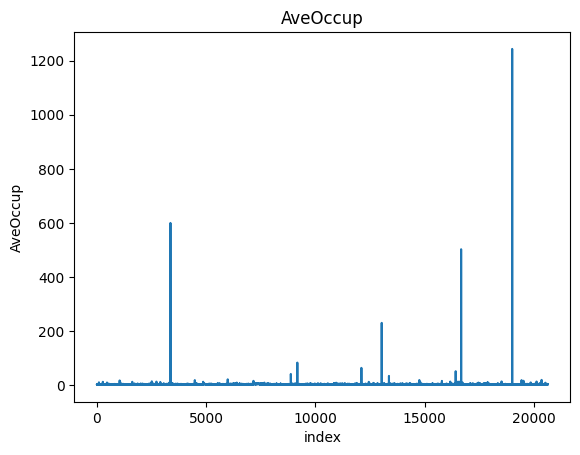

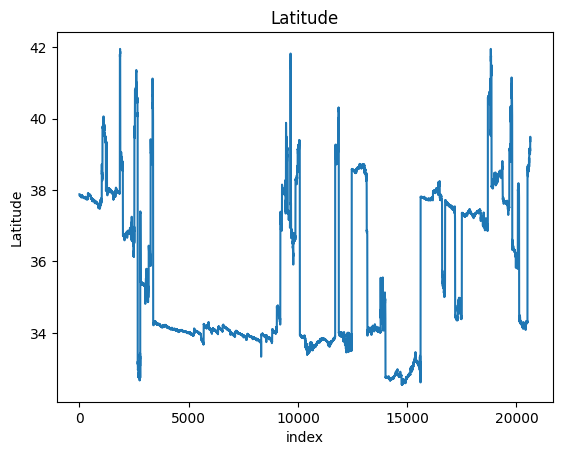

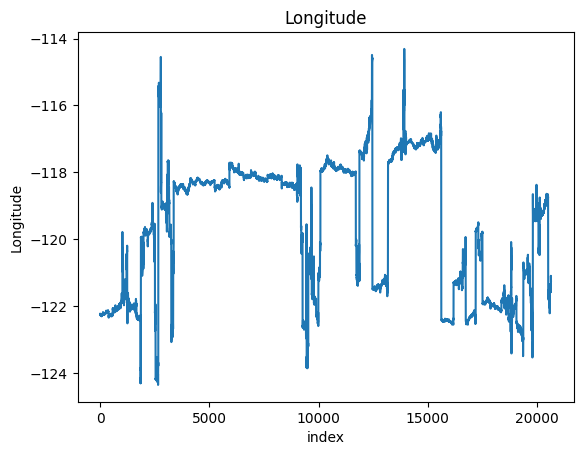

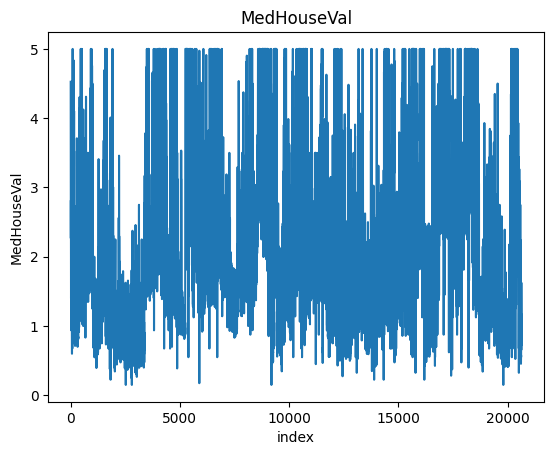

In [6]:
for cols in df.columns:
  plt.plot(df[cols])
  plt.xlabel("index")
  plt.ylabel(cols)
  plt.title(cols)
  plt.show()


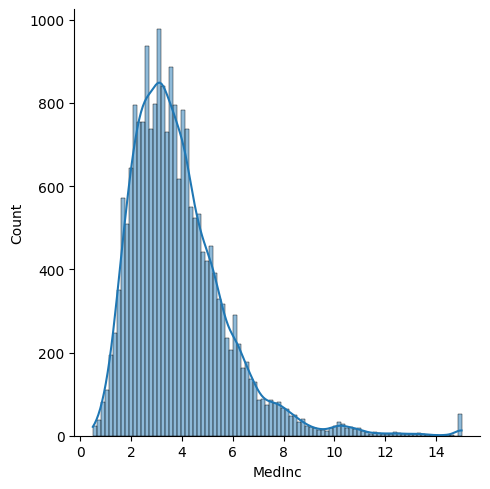

In [7]:
import seaborn as sns
sns.displot(data=df['MedInc'],kde=True)

In [8]:
import numpy as np

a = np.random.permutation([10,20,30,40])
a

array([30, 20, 40, 10])

In [9]:
data = pd.DataFrame({"col1":[10,20,30,70,80],"col2":[20,30,40,90,90]},index=[1,2,3,4,5])
data.loc[1:3]
shufle = np.random.permutation(np.arange(5))
print(shufle)
test_size = int(0.2*len(data))
print(test_size)
indexx = shufle[test_size:]
data.iloc[indexx]
data.iloc[[0,2]]

[2 0 4 3 1]
1


,col1,col2
1,10,20
3,30,40


In [10]:
def shufle_and_split(data,split_ratio):
  np.random.seed(42)
  shufled_indecies = np.random.permutation(len(data))
  test_set_size = int(len(data)*split_ratio)
  test_indices = shufled_indecies[:test_set_size]
  train_indices = shufled_indecies[test_set_size:]
  return data.iloc[train_indices],data.iloc[test_indices]

In [11]:
train_split,test_split = shufle_and_split(df,0.2)
print(train_split.value_counts())
print(test_split.value_counts())

MedInc   HouseAge  AveRooms   AveBedrms  Population  AveOccup   Latitude  Longitude  MedHouseVal
15.0001  43.0      5.687500   0.750000   58.0        3.625000   37.46     -121.87    5.00001        1
         42.0      9.229032   1.161290   829.0       2.674194   34.06     -118.49    5.00001        1
                   8.562500   0.964286   632.0       2.821429   34.05     -118.49    5.00001        1
         40.0      9.802326   1.135659   831.0       3.220930   37.46     -122.18    5.00001        1
                   9.600000   1.059459   1024.0      2.767568   34.09     -118.42    5.00001        1
                                                                                                   ..
0.4999   29.0      2.373272   1.055300   2690.0      12.396313  34.02     -118.28    5.00001        1
         23.0      6.054545   1.672727   198.0       3.600000   36.09     -119.99    1.00000        1
         16.0      21.631579  6.000000   26.0        1.368421   39.42     -122.89    0.

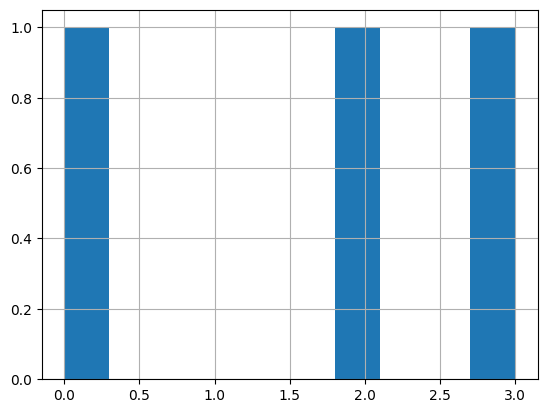

In [12]:
cut  = pd.cut(np.array(data["col1"]), 3)
cut.value_counts().hist()
plt.show()

In [13]:
df["income_cat"] = pd.cut(df["MedInc"],bins=[0.,1.5,3.0,4.5,6.0,np.inf],labels=[1,2,3,4,5])
df['income_cat'].value_counts()
df['income_cat'] = df['income_cat'].astype(int)

stratifiedshuffleslit and split()

//source sklearn stratifiedshufflesplit

split(X, y, groups=None)[source]
Generate indices to split data into training and test set.

Parameters:
Xarray-like of shape (n_samples, n_features)
Training data, where n_samples is the number of samples and n_features is the number of features.

Note that providing y is sufficient to generate the splits and hence np.zeros(n_samples) may be used as a placeholder for X instead of actual training data.

yarray-like of shape (n_samples,) or (n_samples, n_labels)
The target variable for supervised learning problems. Stratification is done based on the y labels.

groupsobject
Always ignored, exists for compatibility.

In [14]:
from sklearn.model_selection import StratifiedShuffleSplit

splitter = StratifiedShuffleSplit(n_splits=10,test_size=0.2,random_state=42)

strat_split = []

for train_index,test_index in splitter.split(df,df["income_cat"]):
  strat_train_set_n = df.iloc[train_index]
  strat_test_set_n = df.iloc[test_index]

  strat_split.append([strat_train_set_n,strat_test_set_n])




In [15]:
strat_train_set,strat_test_set = strat_split[0]

for set_ in (strat_train_set, strat_test_set):
  set_.drop("income_cat", axis=1, inplace=True)

/tmp/ipython-input-3976348491.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  set_.drop("income_cat", axis=1, inplace=True)
/tmp/ipython-input-3976348491.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  set_.drop("income_cat", axis=1, inplace=True)


In [16]:
housing = strat_test_set.copy()

<Axes: xlabel='Longitude', ylabel='Latitude'>

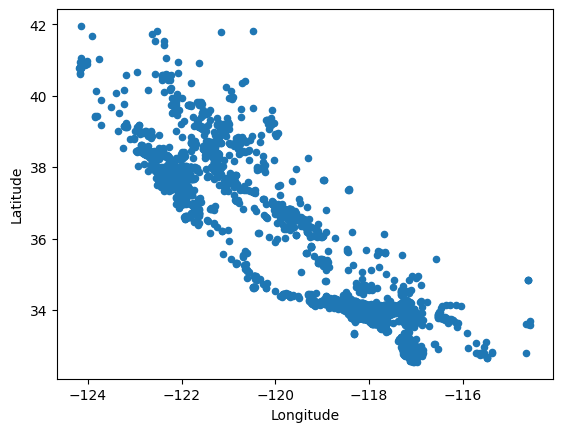

In [17]:

housing.plot(kind="scatter",x="Longitude",y="Latitude")

<Axes: xlabel='Longitude', ylabel='Latitude'>

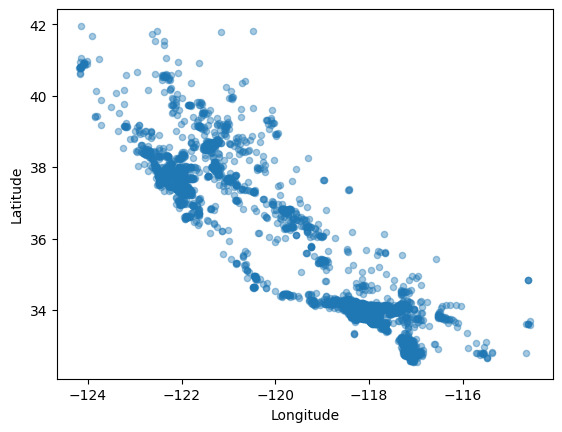

In [18]:

housing.plot(kind="scatter",x="Longitude",y="Latitude",alpha=0.4)

<Axes: xlabel='Longitude', ylabel='Latitude'>

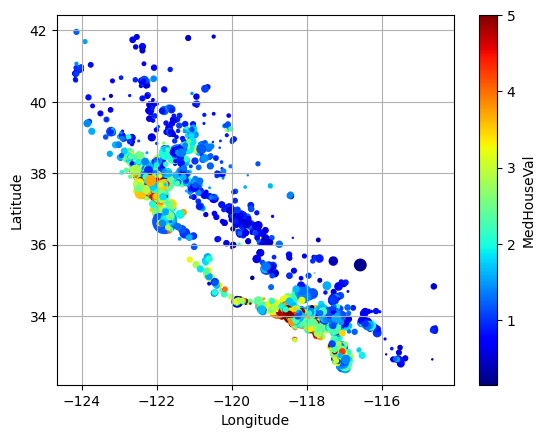

In [19]:
housing.plot(kind="scatter",x="Longitude",s=housing["Population"]/100,grid=True,c="MedHouseVal",y="Latitude",cmap="jet",colorbar=True)

In [20]:
corr = housing.corr()
corr['MedHouseVal'].sort_values(ascending=False)

,MedHouseVal
MedHouseVal,1.000000
MedInc,0.691867
AveRooms,0.192731
HouseAge,0.071210
Population,-0.016164
Longitude,-0.039848
AveBedrms,-0.074535
AveOccup,-0.134999
Latitude,-0.150336


In [21]:
import numpy as np
import pandas as pd
from scipy import sparse

# Sample data
data = pd.DataFrame({
    'Color': ['Red', 'Green', 'Blue', 'Green', 'Red']
})

# Step 1: Get unique categories
categories = sorted(data['Color'].unique())
category_to_index = {cat: i for i, cat in enumerate(categories)}

# Step 2: Initialize empty sparse matrix data
rows = []
cols = []
values = []

# Step 3: Fill sparse matrix info
for row_idx, value in enumerate(data['Color']):
    col_idx = category_to_index[value]
    rows.append(row_idx)
    cols.append(col_idx)
    values.append(1)

# Step 4: Create sparse matrix (CSR format)
n_rows = len(data)
n_cols = len(categories)
sparse_matrix = sparse.csr_matrix((values, (rows, cols)), shape=(n_rows, n_cols))

# Step 5: View results
print("Sparse matrix:\n", sparse_matrix)
print("As dense array:\n", sparse_matrix.toarray())
print("Feature names:", categories)


Sparse matrix:
 <Compressed Sparse Row sparse matrix of dtype 'int64'
	with 5 stored elements and shape (5, 3)>
  Coords	Values
  (0, 2)	1
  (1, 1)	1
  (2, 0)	1
  (3, 1)	1
  (4, 2)	1
As dense array:
 [[0 0 1]
 [0 1 0]
 [1 0 0]
 [0 1 0]
 [0 0 1]]
Feature names: ['Blue', 'Green', 'Red']


In [22]:
import scipy.sparse as sparse
A = [[1., 0., 0., 2., 0.], [3., 4., 0., 5., 0.], [6., 0., 7., 8., 9.], [0., 0., 10., 11., 0.], [0., 0., 0., 0., 12.]]
CSR = sparse.csr_matrix(A)


In [23]:

housing_labels = strat_train_set["MedHouseVal"].copy()

In [24]:
# from sklearn.linear_model import LinearRegression
# from sklearn.preprocessing import StandardScaler



# scaler = StandardScaler()
# scaled_labels = scaler.fit_transform(housing_labels.to_frame())


# model = LinearRegression()
# model.fit(df[["MedInc"]],scaled_labels) # Corrected column name and shape
# some_new_data = housing[["MedInc"]].iloc[:5] # Corrected column name
# scaled_predictions = model.predict(some_new_data)
# scaled_predictions

<Axes: xlabel='MedInc', ylabel='MedHouseVal'>

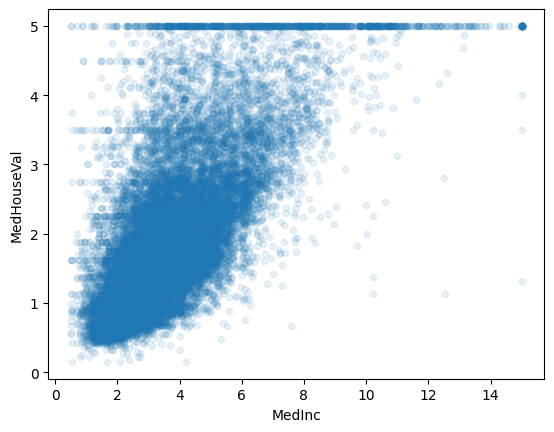

In [25]:
df.plot(kind="scatter", x = "MedInc",y="MedHouseVal",alpha=0.1)


tring to add noise to the data quirks, and seeing if we can fix the data

<Axes: xlabel='MedInc', ylabel='MedHouseVal'>

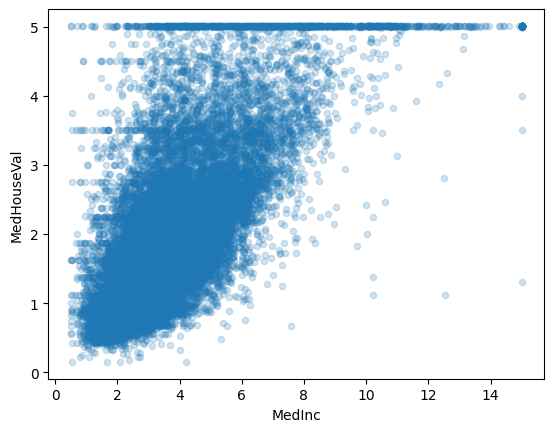

In [26]:
capped = df.copy()
capped["MedHouseVal"] = df["MedHouseVal"].apply(
    lambda x : x + np.random.uniform(0.0,0.01) if x >= 5.0 or x == 4.5 or x == 3.5 else x
)


capped.describe()
capped.plot(kind = "scatter", x = "MedInc",y="MedHouseVal", alpha = 0.2)

using flags instead of introducing the new noise

In [27]:
capped = df.copy()
condition = (df["MedHouseVal"] >= 5.0) | (df["MedHouseVal"].isin([4.5, 3.5]))
capped["is_capped"] = condition.astype(int)


capped['is_capped'].value_counts()
# capped.plot(kind = "scatter", x = "MedInc",y="MedHouseVal", alpha = 0.2)

,count
is_capped,
0,19532
1,1108


In [28]:
capped.describe()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedHouseVal,income_cat,is_capped
count,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,3.870671,28.639486,5.429000,1.096675,1425.476744,3.070655,35.631861,-119.569704,2.068558,3.006686,0.053682
std,1.899822,12.585558,2.474173,0.473911,1132.462122,10.386050,2.135952,2.003532,1.153956,1.054618,0.225395
min,0.499900,1.000000,0.846154,0.333333,3.000000,0.692308,32.540000,-124.350000,0.149990,1.000000,0.000000
25%,2.563400,18.000000,4.440716,1.006079,787.000000,2.429741,33.930000,-121.800000,1.196000,2.000000,0.000000
50%,3.534800,29.000000,5.229129,1.048780,1166.000000,2.818116,34.260000,-118.490000,1.797000,3.000000,0.000000
75%,4.743250,37.000000,6.052381,1.099526,1725.000000,3.282261,37.710000,-118.010000,2.647250,4.000000,0.000000
max,15.000100,52.000000,141.909091,34.066667,35682.000000,1243.333333,41.950000,-114.310000,5.000010,5.000000,1.000000


In [29]:
capped['Population'].value_counts()

,count
Population,
891.0,25
1052.0,24
761.0,24
850.0,24
1227.0,24
...,...
3700.0,1
5558.0,1
6437.0,1


In [30]:
corr = capped.corr()
corr['MedHouseVal'].sort_values(ascending = False)

,MedHouseVal
MedHouseVal,1.000000
MedInc,0.688075
income_cat,0.643892
is_capped,0.579542
AveRooms,0.151948
HouseAge,0.105623
AveOccup,-0.023737
Population,-0.024650
Longitude,-0.045967
AveBedrms,-0.046701


In [31]:
capped["popbydistrict"] = capped["AveRooms"]/capped['AveOccup']
capped["bedroomsperhouse"] = capped['AveRooms']/capped['AveBedrms']

In [32]:
corr = capped.corr()
corr['MedHouseVal'].sort_values(ascending = False)


,MedHouseVal
MedHouseVal,1.000000
MedInc,0.688075
income_cat,0.643892
is_capped,0.579542
bedroomsperhouse,0.383672
popbydistrict,0.209482
AveRooms,0.151948
HouseAge,0.105623
AveOccup,-0.023737
Population,-0.024650


In [33]:
capped['income_cat'] = capped['income_cat'].astype(int)
capped.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   MedInc            20640 non-null  float64
 1   HouseAge          20640 non-null  float64
 2   AveRooms          20640 non-null  float64
 3   AveBedrms         20640 non-null  float64
 4   Population        20640 non-null  float64
 5   AveOccup          20640 non-null  float64
 6   Latitude          20640 non-null  float64
 7   Longitude         20640 non-null  float64
 8   MedHouseVal       20640 non-null  float64
 9   income_cat        20640 non-null  int64  
 10  is_capped         20640 non-null  int64  
 11  popbydistrict     20640 non-null  float64
 12  bedroomsperhouse  20640 non-null  float64
dtypes: float64(11), int64(2)
memory usage: 2.0 MB


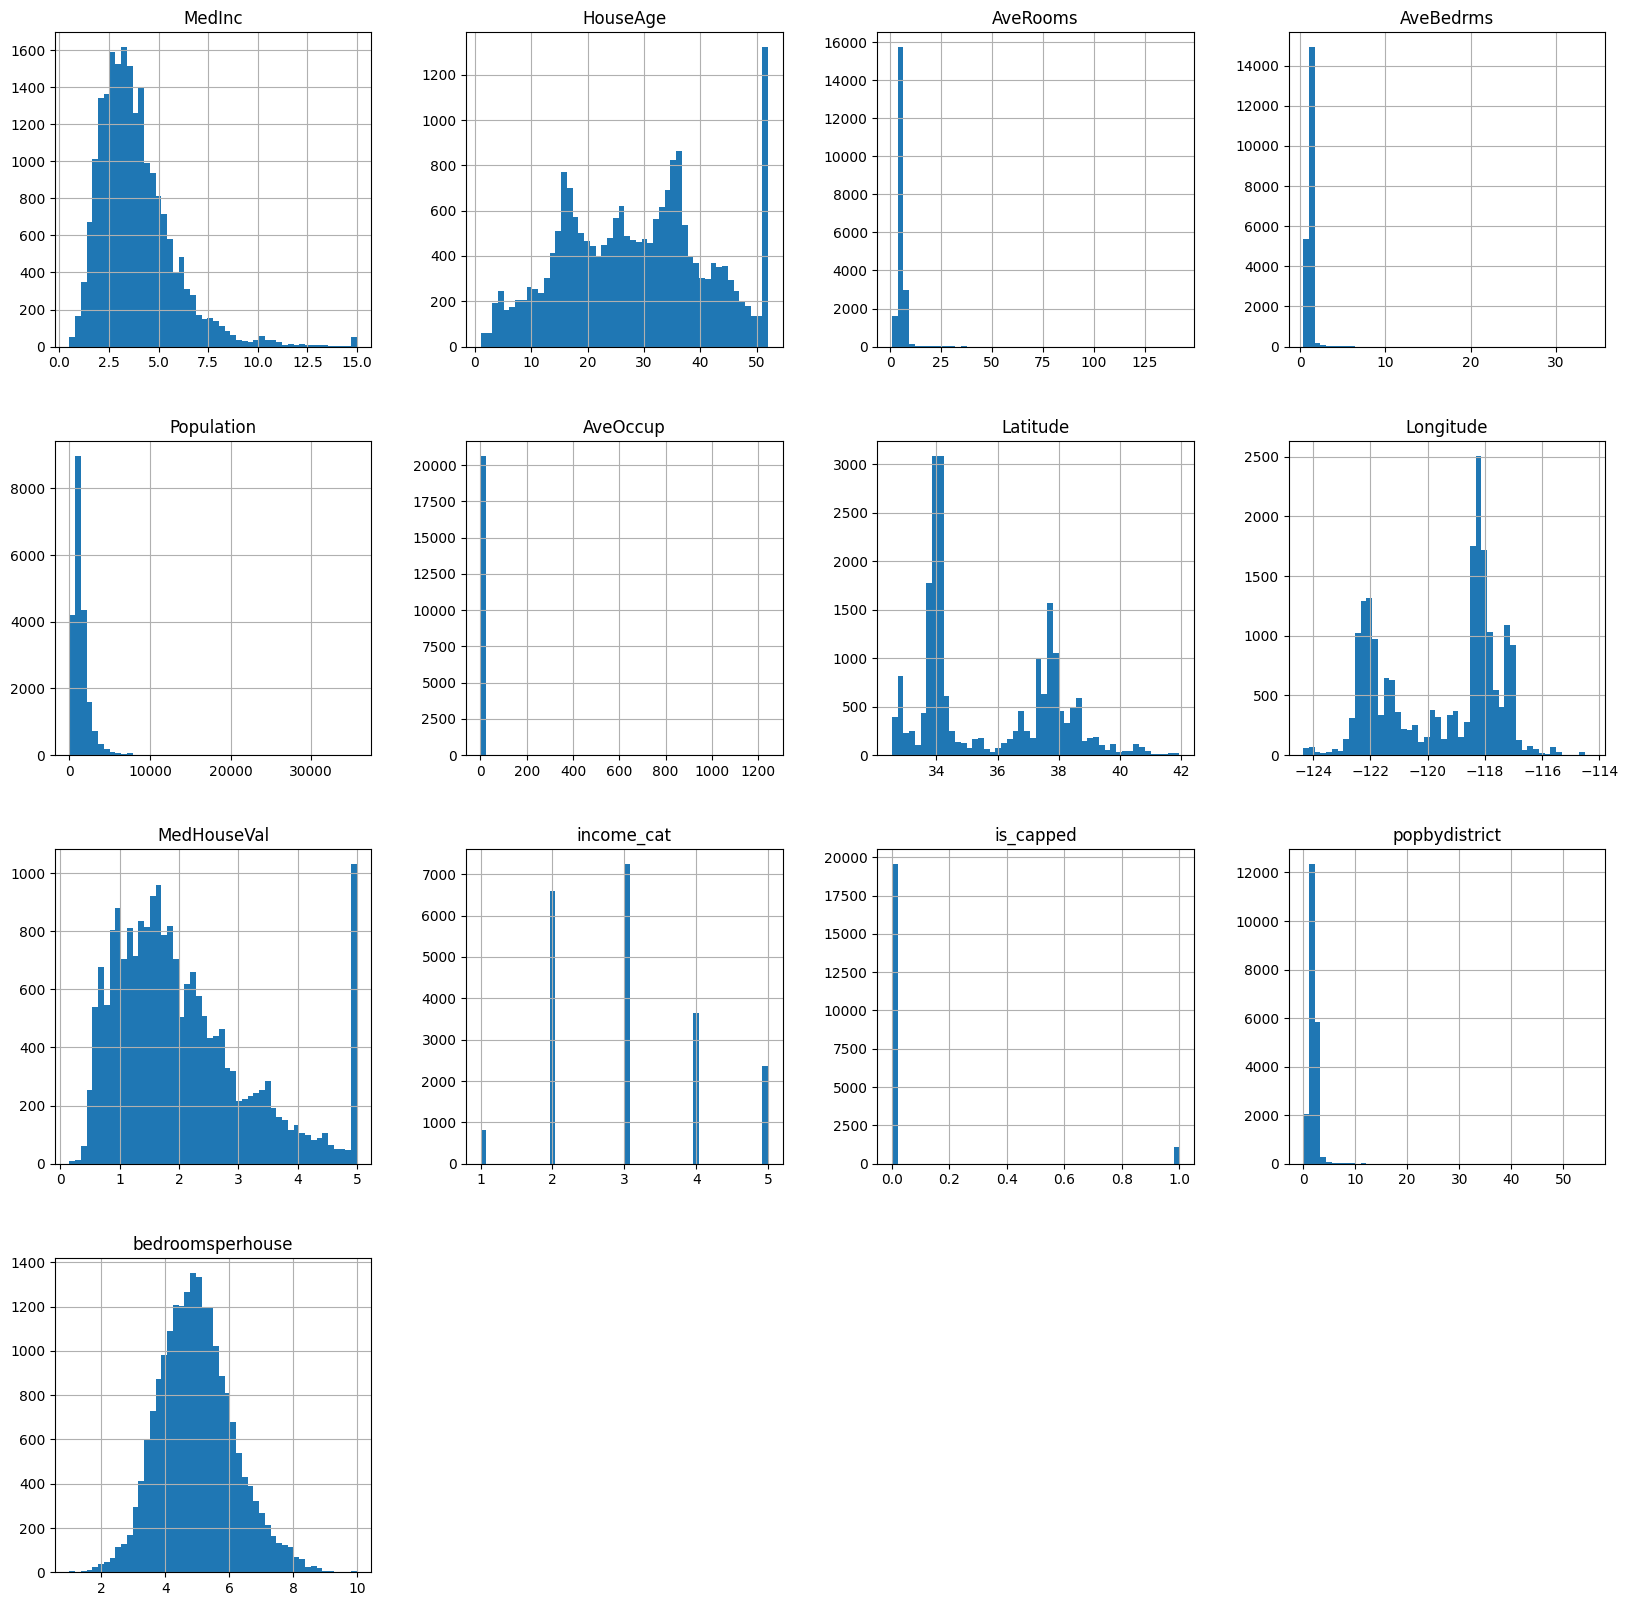

In [34]:
capped.hist(bins=50, figsize=(20,20))
plt.show()

In [35]:
print((capped['AveRooms'] == 0).value_counts(),
(capped['AveBedrms'] == 0).value_counts())

AveRooms
False    20640
Name: count, dtype: int64 AveBedrms
False    20640
Name: count, dtype: int64


In [36]:
capped = capped[(capped['AveBedrms'] != 0) & (capped['AveRooms'] != 0)]

applying log to the skewed data columns,to make them normally distributed and also need to change the multimodal distributions

In [37]:
capped['MedInc']

,MedInc
0,8.3252
1,8.3014
2,7.2574
3,5.6431
4,3.8462
...,...
20635,1.5603
20636,2.5568
20637,1.7000
20638,1.8672


In [38]:
capped['MedInc'] = df['MedInc']
capped['MedInc']

,MedInc
0,8.3252
1,8.3014
2,7.2574
3,5.6431
4,3.8462
...,...
20635,1.5603
20636,2.5568
20637,1.7000
20638,1.8672


array([[<Axes: title={'center': 'MedInc'}>,
        <Axes: title={'center': 'HouseAge'}>,
        <Axes: title={'center': 'AveRooms'}>,
        <Axes: title={'center': 'AveBedrms'}>],
       [<Axes: title={'center': 'Population'}>,
        <Axes: title={'center': 'AveOccup'}>,
        <Axes: title={'center': 'Latitude'}>,
        <Axes: title={'center': 'Longitude'}>],
       [<Axes: title={'center': 'MedHouseVal'}>,
        <Axes: title={'center': 'income_cat'}>,
        <Axes: title={'center': 'is_capped'}>,
        <Axes: title={'center': 'popbydistrict'}>],
       [<Axes: title={'center': 'bedroomsperhouse'}>, <Axes: >, <Axes: >,
        <Axes: >]], dtype=object)

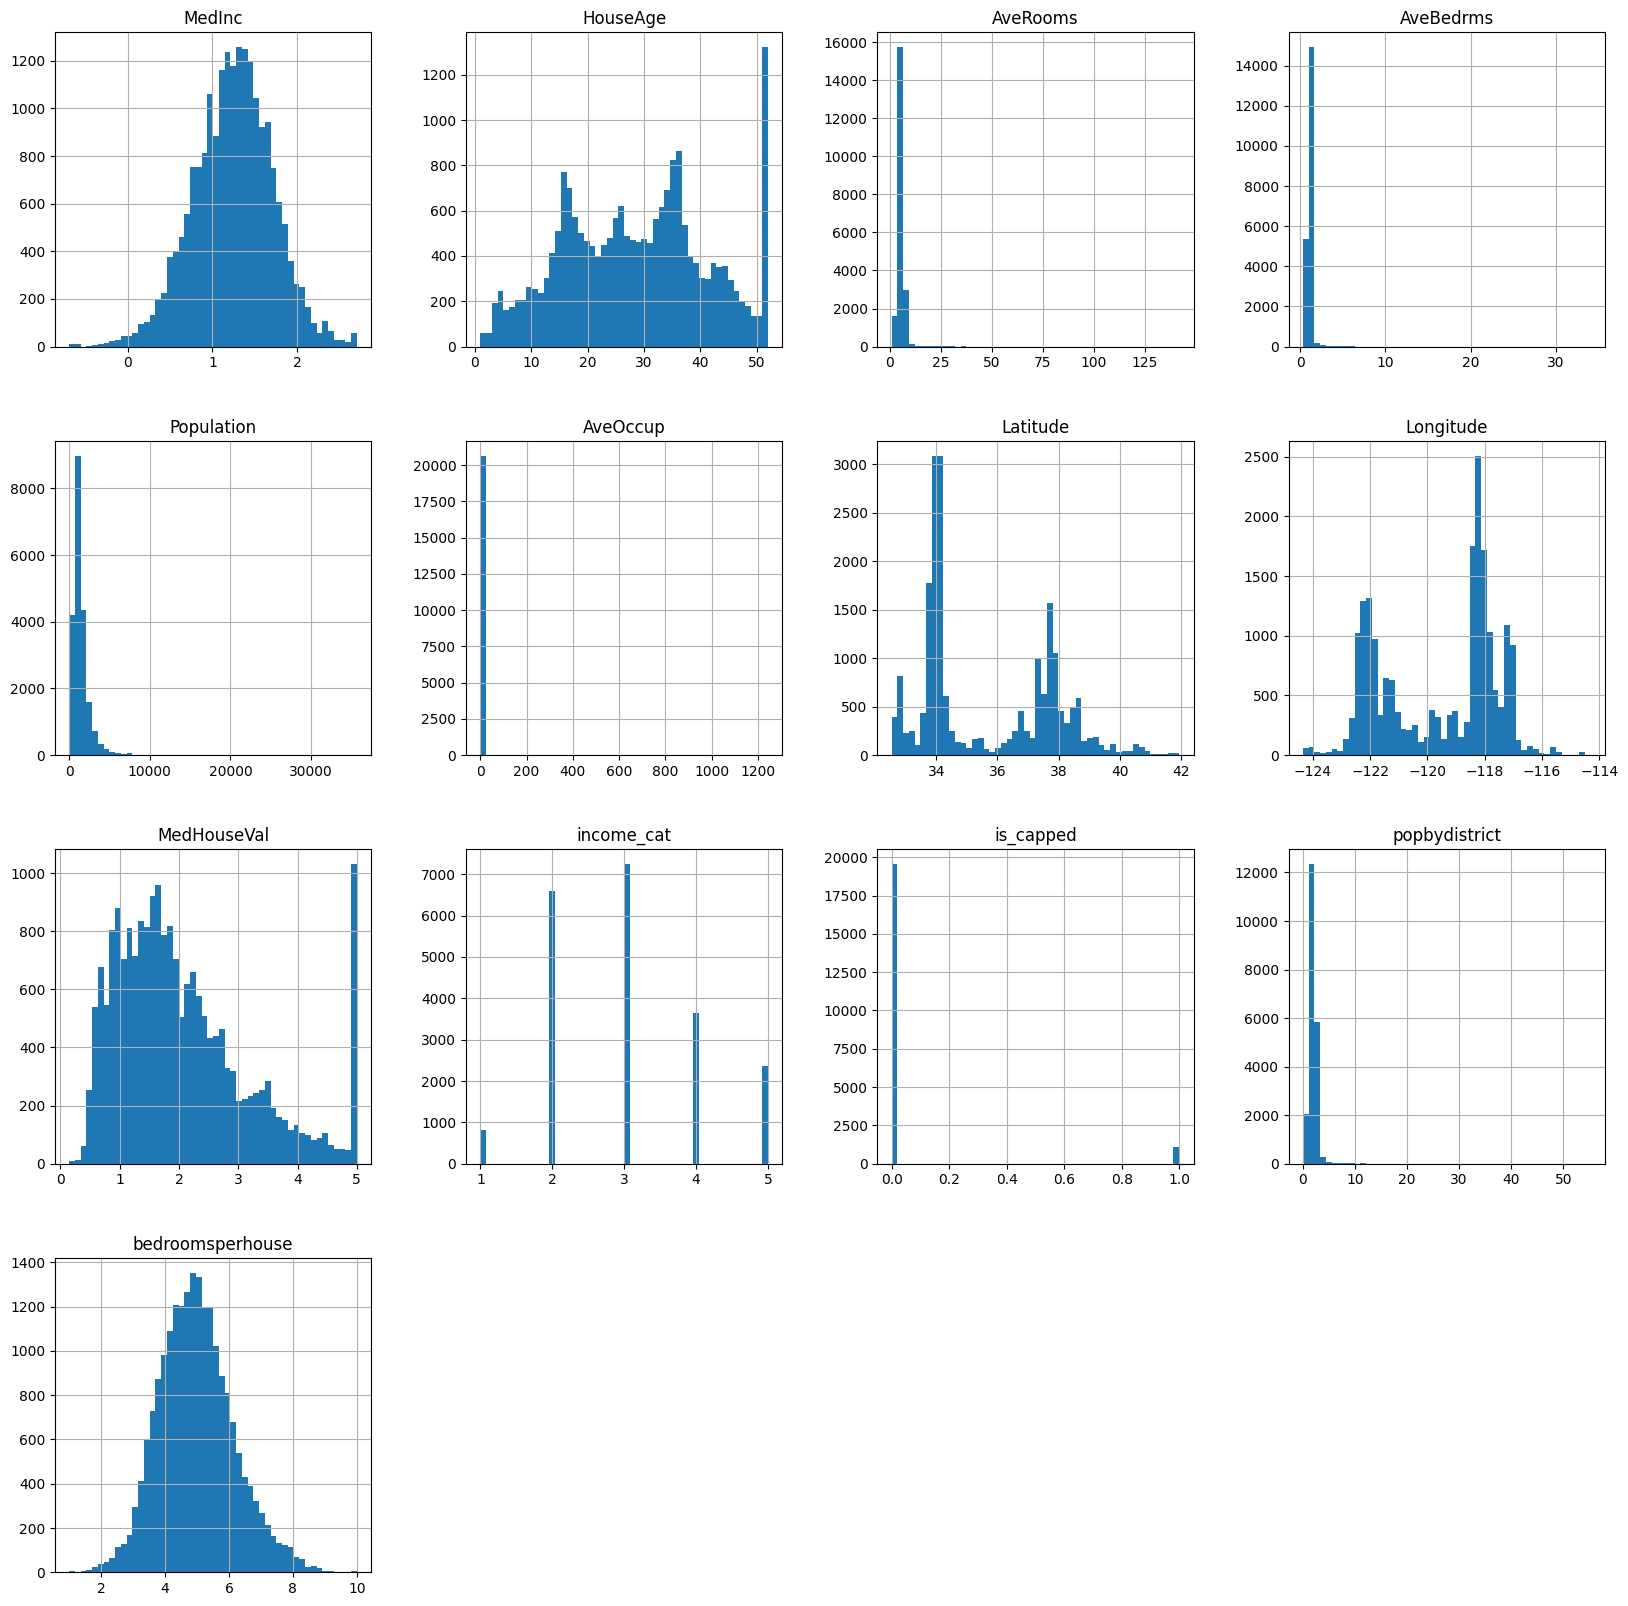

In [39]:
capped['MedInc'] = capped['MedInc'].apply(np.log)
capped['AveBedrms'] = df['AveBedrms']
capped.hist(bins=50,figsize=(20,20))

**custom transformers**

<Axes: >

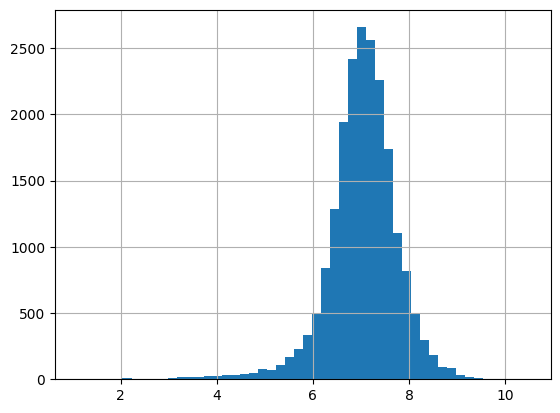

In [40]:
from sklearn.preprocessing import FunctionTransformer

logTranformer = FunctionTransformer(np.log, inverse_func=np.exp)

log_pop = logTranformer.transform(capped['Population'])


capped['Population'] = log_pop
capped['Population'].hist(bins=50)

The following exercises are based on this chapter’s housing dataset:
1. Try a support vector machine regressor (sklearn.svm.SVR) with various
hyperparameters, such as kernel="linear" (with various values for the C
hyperparameter) or kernel="rbf" (with various values for the C and
gamma hyperparameters). Note that support vector machines don’t scale
well to large datasets, so you should probably train your model on just
the first 5,000 instances of the training set and use only 3-fold crossvalidation, or else it will take hours. Don’t worry about what the
hyperparameters mean for now; we’ll discuss them in Chapter 5. How
does the best SVR predictor perform?
2. Try replacing the GridSearchCV with a RandomizedSearchCV.
3. Try adding a SelectFromModel transformer in the preparation pipeline
to select only the most important attributes.
4. Try creating a custom transformer that trains a k-nearest neighbors
regressor (sklearn.neighbors.KNeighborsRegressor) in its fit() method,
and outputs the model’s predictions in its transform() method. Then add
this feature to the preprocessing pipeline, using latitude and longitude as
the inputs to this transformer. This will add a feature in the model that
corresponds to the housing median price of the nearest districts.
5. Automatically explore some preparation options using GridSearchCV.
6. Try to implement the StandardScalerClone class again from scratch,
then add support for the inverse_transform() method: executing scaler.
inverse_transform(scaler.fit_transform(X)) should return an array very
close to X. Then add support for feature names: set feature_names_in_
in the fit() method if the input is a DataFrame. This attribute should be a
NumPy array of column names. Lastly, implement the
get_feature_names_out() method: it should have one optional
input_features=None argument. If passed, the method should check that
its length matches n_features_in_, and it should match
feature_names_in_ if it is defined; then input_features should be
returned. If input_features is None, then the method should either return
feature_names_in_ if it is defined or np.array(["x0", "x1", ...]) with
length n_features_in_ otherwise.


In [41]:
from sklearn.utils.validation import check_array, check_is_fitted
X = check_array([[1, 2, 3], [4, 5, 6]])
X

b = np.array([[1, 2, 3], [4, 5, 6]])
b.shape[0]

2

In [42]:
from sklearn.base import BaseEstimator,TransformerMixin
from sklearn.utils.validation import check_array, check_is_fitted



class StandardScaler(BaseEstimator,TransformerMixin):
  def __init__(self,with_mean = True):
    self.with_mean = with_mean
  def fit(self,X,y=None):
    X = check_array(X)
    self.mean_ = X.mean(axis=0)
    self.scale_ = X.std(axis=0)
    self.n_features_in_ = X.shape[1]
    return self
  def transform(self,X):
    check_is_fitted(self)
    X = check_array(X)
    if self.with_mean:
      X = X - self.mean_
      return X/self.scale_

In [43]:
from sklearn.neighbors import KNeighborsRegressor
from sklearn.utils.validation import check_array,check_is_fitted
from sklearn.base import BaseEstimator,TransformerMixin
from sklearn.metrics.pairwise import rbf_kernel

class ClusterSimilarity(BaseEstimator,TransformerMixin):
  def __init__(self,k_neigbours = 5,p = 2,weights='distance'):
    self.k_neigbours = k_neigbours
    self.p = p
    self.weights = weights
  def fit(self,X,y=None):
    self.KNN_ = KNeighborsRegressor(n_neighbors = self.k_neigbours, p = self.p)
    self.KNN_.fit(X,y)
    return self
  def transform(self,X):
    check_is_fitted(self)
    X = check_array(X)
    pred = self.KNN_.predict(X)
    return pred.reshape(-1,1)






In [44]:
clusterSimili = ClusterSimilarity()
similarity = clusterSimili.fit_transform(capped[['Longitude','Latitude']].values,capped['MedHouseVal'].values)
capped['KNN_median_price'] = similarity
capped['KNN_median_price'].info()

<class 'pandas.core.series.Series'>
RangeIndex: 20640 entries, 0 to 20639
Series name: KNN_median_price
Non-Null Count  Dtype  
--------------  -----  
20640 non-null  float64
dtypes: float64(1)
memory usage: 161.4 KB


In [45]:
capped['KNN_median_price']


,KNN_median_price
0,3.980400
1,3.729202
2,3.903602
3,3.333800
4,3.333800
...,...
20635,0.831600
20636,0.840400
20637,0.853600
20638,0.824200


In [46]:
from sklearn.cluster import KMeans
class KMeansSimilarity(BaseEstimator,TransformerMixin):
  def __init__(self,n_estimators = 10,init='k-means++',random_state=42):
    self.n_estimators = n_estimators
    self.init = init
    self.random_state = random_state
  def fit(self,X,y = None):
    X = check_array(X)
    self.Kmeanss_ = KMeans(self.n_estimators,init = self.init,random_state = self.random_state)
    self.Kmeanss_.fit(X)
    return self
  def transform(self,X):
    check_is_fitted(self)
    X = check_array(X)
    return rbf_kernel(X,self.Kmeanss_.cluster_centers_)


In [47]:
kmeansSimilarity = KMeansSimilarity()
simili = kmeansSimilarity.fit_transform(capped[['Longitude','Latitude']])

simili_names = [f'cluster_simili_{i}' for i in range(simili.shape[1])]

sim_df = pd.DataFrame(simili.round(2), columns = simili_names)

In [48]:
capped = pd.concat([capped,sim_df],axis=1)

In [49]:
capped["cluster_simili_1"].value_counts()

,count
cluster_simili_1,
0.00,12154
0.98,594
0.97,436
0.02,398
0.01,356
...,...
0.06,18
0.27,17
0.26,15


In [50]:
capped.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 24 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   MedInc            20640 non-null  float64
 1   HouseAge          20640 non-null  float64
 2   AveRooms          20640 non-null  float64
 3   AveBedrms         20640 non-null  float64
 4   Population        20640 non-null  float64
 5   AveOccup          20640 non-null  float64
 6   Latitude          20640 non-null  float64
 7   Longitude         20640 non-null  float64
 8   MedHouseVal       20640 non-null  float64
 9   income_cat        20640 non-null  int64  
 10  is_capped         20640 non-null  int64  
 11  popbydistrict     20640 non-null  float64
 12  bedroomsperhouse  20640 non-null  float64
 13  KNN_median_price  20640 non-null  float64
 14  cluster_simili_0  20640 non-null  float64
 15  cluster_simili_1  20640 non-null  float64
 16  cluster_simili_2  20640 non-null  float6

In [51]:
num_cols = capped.select_dtypes(include=['int64','float64']).columns
num_cols
# capped.info()

Index(['MedInc', 'HouseAge', 'AveRooms', 'AveBedrms', 'Population', 'AveOccup',
       'Latitude', 'Longitude', 'MedHouseVal', 'income_cat', 'is_capped',
       'popbydistrict', 'bedroomsperhouse', 'KNN_median_price',
       'cluster_simili_0', 'cluster_simili_1', 'cluster_simili_2',
       'cluster_simili_3', 'cluster_simili_4', 'cluster_simili_5',
       'cluster_simili_6', 'cluster_simili_7', 'cluster_simili_8',
       'cluster_simili_9'],
      dtype='object')

In [52]:
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import make_column_selector
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import FunctionTransformer
import numpy as np

# Define numerical columns (excluding target 'MedHouseVal' and redundant columns if needed)
num_cols = [
    'MedInc', 'HouseAge', 'AveRooms', 'AveBedrms', 'Population', 'AveOccup',
    'Latitude', 'Longitude', 'income_cat', 'is_capped', 'popbydistrict',
    'bedroomsperhouse', 'KNN_median_price',
    'cluster_simili_0', 'cluster_simili_1', 'cluster_simili_2', 'cluster_simili_3',
    'cluster_simili_4', 'cluster_simili_5', 'cluster_simili_6', 'cluster_simili_7',
    'cluster_simili_8', 'cluster_simili_9'
]

# Define the ColumnTransformer
preprocessing = ColumnTransformer(
    transformers=[
        ("num_pipeline", make_pipeline(SimpleImputer(strategy='mean'), StandardScaler()), num_cols),
        ("log_pipeline", make_pipeline(SimpleImputer(strategy='mean'), FunctionTransformer(np.log1p)),
         ['AveRooms', 'AveBedrms', 'MedHouseVal']),
        ("geo", ClusterSimilarity(), ['Longitude', 'Latitude'])
    ],
    remainder='drop'
)

IN the code cell below i have used both **StratifiedShuffleSplit** and **cross_val_score** which means the data is divided using stratified split first and then the split data is again split into 5 folds by cv


In [67]:
from sklearn.model_selection import StratifiedShuffleSplit
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error

splitter = StratifiedShuffleSplit(test_size=0.2,n_splits=10, random_state=42)
model = LinearRegression()

for i,(train_index,test_index) in enumerate(splitter.split(capped,capped['income_cat'])):
  # train = capped.iloc[train_index]
  # test = capped.iloc[test_index]
  # print(f'fold{i}')
  # print(f'train index {train_index}')
  # print(f'train index {test_index}')
  train = capped.iloc[train_index]
  test = capped.iloc[test_index]

  x_train,y_train = train.drop('MedHouseVal',axis=1),train['MedHouseVal']
  x_test,y_test = test.drop('MedHouseVal',axis=1),test['MedHouseVal']



  cv = cross_val_score(model,x_train,y_train,cv = 5)

  print(cv.mean())

  model.fit(x_train,y_train)
  pred = model.predict(x_test)
  mae = mean_absolute_error(pred,y_test)
  print('mean_absolute_error:', mae)



# print(train.info())
# print(test.info())

0.8971688771056797
mean_absolute_error: 0.24758398641481258
0.8972962165424999
mean_absolute_error: 0.249374570602596
0.8962902643747388
mean_absolute_error: 0.2455034849912523
0.8981186571889879
mean_absolute_error: 0.25483744735254926
0.8647273353419994
mean_absolute_error: 0.25263858243694237
0.8970948930770059
mean_absolute_error: 0.2476916292466262
0.8976490172534518
mean_absolute_error: 0.24816322027922355
0.8972590067290931
mean_absolute_error: 0.24610512562305986
0.8997012902766274
mean_absolute_error: 0.2557313825009643
0.8968056127875915
mean_absolute_error: 0.24783855930084217


In [68]:
from sklearn.model_selection import StratifiedShuffleSplit
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error

splitter = StratifiedShuffleSplit(test_size=0.2,n_splits=10, random_state=42)
model = RandomForestRegressor()

for i,(train_index,test_index) in enumerate(splitter.split(capped,capped['income_cat'])):
  # train = capped.iloc[train_index]
  # test = capped.iloc[test_index]
  # print(f'fold{i}')
  # print(f'train index {train_index}')
  # print(f'train index {test_index}')
  train = capped.iloc[train_index]
  test = capped.iloc[test_index]

  x_train,y_train = train.drop('MedHouseVal',axis=1),train['MedHouseVal']
  x_test,y_test = test.drop('MedHouseVal',axis=1),test['MedHouseVal']



  cv = cross_val_score(model,x_train,y_train,cv = 5)

  print(cv.mean())

  model.fit(x_train,y_train)
  pred = model.predict(x_test)
  mae = mean_absolute_error(pred,y_test)
  print('mean_absolute_error:', mae)



# print(train.info())
# print(test.info())

0.9150088729288285
mean_absolute_error: 0.21456547539015075
0.9152169419713185
mean_absolute_error: 0.21539581899011168
0.915149663078959
mean_absolute_error: 0.20984870191901367
0.916355809324161
mean_absolute_error: 0.21782663096820556
0.9164192949946866
mean_absolute_error: 0.2183530213528517


KeyboardInterrupt: 